# Congressional Voting Records Project

This project will use the Congressional Voting Records data set to leverage supervised machine learning and create a model to predict how Congress will vote. The data description explains that the data contains votes for each of the U.S. House of Representatives Congressmen on the 16 key votes. There are nine different types of votes available: voted for, paired for, and announced for (these three simplified to y), voted against, paired against, and announced against (these three simplified to n), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known '?'.

The data can be found available at: https://www.kaggle.com/devvret/congressional-voting-records. 


## Explore the Data Set

To explore the data set we will import the relevant packages and load the data replacing all '?' with null values('NaN'). The data will be assigned to 'votes' and then the shape will be explored. We can see that there is 435 rows and 17 columns within the data set and the first five lines of data show us the column names.


In [132]:
#import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#read the data set and name it "votes"
votes = pd.read_csv('house-votes-84.csv', delimiter=',',  na_values='?')

#print the shape of the data
print(votes.shape)

#view the first five lines of data
votes.head()


(435, 17)


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


## Pre-Processing

In order to be able to fit the data to a model and make predictions we will pre process the data by converting 'y' to 1 and 'n' to 0. The null values will be dropped to allow the classification task to run. The column names are also quite long so we will rename them to simplify.

In [133]:
#convert y to 1 and n to 0
votes[votes == 'y'] = 1
votes[votes == 'n'] = 0

#rename all column names
votes = votes.rename({' handicapped-infants': 'Handicapped Infants', ' water-project-cost-sharing': 'Water Project Cost Share', ' adoption-of-the-budget-resolution': 'Budget', ' physician-fee-freeze': 'Physician', ' el-salvador-aid': 'El Salvador Aid', ' religious-groups-in-schools': 'Religious Groups', ' anti-satellite-test-ban': 'Anti Satellite', ' aid-to-nicaraguan-contras': 'Aid to Nicaragua', ' mx-missile': 'Missile', ' immigration': 'Immigration', ' synfuels-corporation-cutback': 'Synfuels Cutback', ' education-spending': 'Education', ' superfund-right-to-sue': 'Superfund Sue', ' crime': 'Crime', ' duty-free-exports': 'Duty Free Exports', ' export-administration-act-south-africa': 'South African Export Administration Act'}, axis=1)

#drop any null values 
votes = votes.dropna()

#view first five lines
votes.head()


,Class Name,Handicapped Infants,Water Project Cost Share,Budget,Physician,El Salvador Aid,Religious Groups,Anti Satellite,Aid to Nicaragua,Missile,Immigration,Synfuels Cutback,Education,Superfund Sue,Crime,Duty Free Exports,South African Export Administration Act
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


We will have a closer look at the Duty Free Exports column to visualise how many Duty Free Exports are voted for and against. This is displayed in a countplot with the number of Congress votes for and against represented by 'Yes' and 'No.' The plot shows over 140 no votes and around 80 yes votes which allows us to understand the dataset more. 

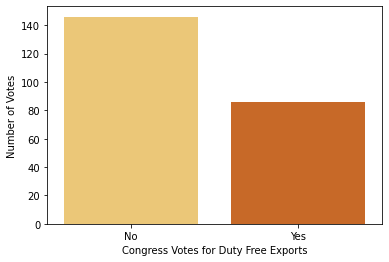

In [134]:
plt.figure()
sns.countplot(x='Duty Free Exports', data= votes, palette='YlOrBr')
plt.xlabel('Congress Votes for Duty Free Exports')
plt.ylabel('Number of Votes')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## Fit the Classifier

In order to complete a classification task the data will be fit to k-Nearest Neighbors classifier. Scikit-learn requires a specific format where the values are in an array with each column being a feature and each row a different observation. 'X' represents a feature array and a response variable 'y'. With have set a k nearest neighbour to 5 with the n_neighbors parameter. 'X' has been dropped from the feature array to ensure they are Numpy arrays and the fitVote classifier is fit to the voting data. 

In [135]:
# create array for feature variable
y = votes['Class Name'].values

# create array for response variable
X = votes.drop('Class Name', axis=1).values

# create k-NN classifier with 5 neighbors
fitVote = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the data
fitVote.fit(X, y)



KNeighborsClassifier()

After fitting the fitVote classifier we can predict the label of a data point. We have used all the data to create the model so the predicting on the same data is not a good indicator. However as we do not have new unseen data we will continue to apply it to the X model just to understand how to create predictions more. Using .predict() on X will generate 435 predictions: 1 for each sample. Ideally you would apply the classifier to fresh data. 



## Predict 

In [136]:
# predict the labels for the training data X
y_pred = fitVote.predict(X)

# Predict and print the label for X
print("Prediction: {}".format(y_pred)) 


Prediction: ['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'republican' 'republican' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'republican'
 'republican' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'republica

We can see that creating 435 prediction is not very useful. We will try to split the data first to split two-thirds of the data to train and keep one-third of the data to test. This will allow us to check how effective the model is by generating 1 prediction. Allowing us to understand how congress will vote on certain issues by applying the score and printing the accuracy as a percentage. 

## Improve the Model

In [137]:
# create array for feature variable
y = votes['Class Name'].values

# create array for response variable
X = votes.drop('Class Name', axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42, stratify=y)

# create the k-NN classifier with 7 neighbors
kNN = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
kNN.fit(X_train, y_train)

# Print the accuracy
print(kNN.score(X_test, y_test)*100)


90.9090909090909


This shows that there is 90.9% accuracy for our model we have created. 
